# <strong>Mathematical Tools 2 (Chapter 9)
<br>
## <strong>1 보간법(interplation)</strong>
Function with two parameters : <strong>독렵변수를 관찰할수 없을 때, 종속변수 추정시 사용
1. '독립변수'를 관찰하기 힘들떄, <strong>'종속변수를 활용'한 모델을 추정</strong>
1. 수학적으로는 복잡하여 <strong>다차원</strong>에는 적용하기가 힘들다
1. <strong>X축 방향으로 정렬된 자료를 사용</strong>하는 점만 제외하면, 나머지는 회귀법과 동일

### <strong>01 Sin() 데이터의 생성 및 모듈 불러오기
Data and <strong>Sin()

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

def f(x):
    return np.sin(x) + 0.5 * x

### <strong>02 1차원 선형분리를 활용한 보간법
interplation : <strong>n개</strong>의 <strong>1차 다항식</strong>을 연결하여 모델을 생성

f(x)와 iy의 일치확인  : True


array([-3.14159265, -2.37979327, -1.75196847, -1.35619449, -1.2283697 ,
       -1.33259571, -1.57079633, -1.80899694, -1.91322295, -1.78539816,
       -1.38962418, -0.76179939,  0.        ,  0.76179939,  1.38962418,
        1.78539816,  1.91322295,  1.80899694,  1.57079633,  1.33259571,
        1.2283697 ,  1.35619449,  1.75196847,  2.37979327,  3.14159265,
        0.        ,  0.        ])

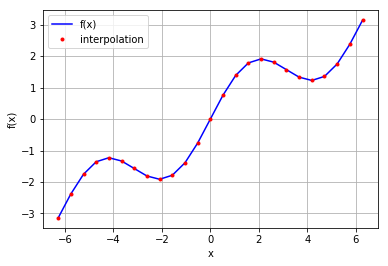

In [2]:
import scipy.interpolate as spi
ipo = spi.splrep(x, f(x), k=1)  # 1차원 스플릿라인 함수를 사용 ex) y=ax+b
iy  = spi.splev(x, ipo)         # 시뮬레이션 결과 (polyvalue()) 

# 두 관측점 사이를 선형으로 보간 (관측점에선 연속 미분은 아니다)
plt.plot(x, f(x), 'b', label = 'f(x)')           # 원본 Sin() 그래프
plt.plot(x, iy,  'r.', label = 'interpolation')  # 1차원 interplation 결과
plt.legend(loc = 0)
plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

# 함수를 활용한 동일성 확인 (1차식 사용시 정확도가 가장 높음)
print("""f(x)와 iy의 일치확인  : {}""".format(np.allclose(f(x), iy)))
ipo[1]

### <strong>03 Spline을 활용한 1차원 선형분리 보간법
Using spline : <strong>1차식 갯수를 특정</strong>하여 생성한 보간법

Text(0,0.5,'f(x)')

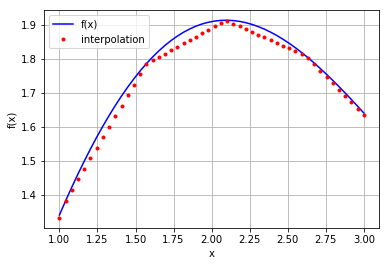

In [3]:
xd  = np.linspace(1.0, 3.0, 50) 
ipo = spi.splrep(x, f(x), k=1)  # 1차원 스플릿라인 함수 ex) y=ax+b
iyd = spi.splev(xd, ipo)        # 시뮬레이션 결과 값

plt.plot(xd, f(xd), 'b', label='f(x)')          # xd 를 기초로 Sin()을 그린다
plt.plot(xd,  iyd, 'r.', label='interpolation') # xd 로 spline 시뮬레이션 결과 
plt.legend(loc=0); plt.grid(True); plt.xlabel('x'); plt.ylabel('f(x)')

### <strong>04 3차원 선형분리를 활용한 보간법
Using 3dim Spline : <strong>3차식을 활용</strong>한 보간법

f(xd), iyd의 일치확인 : False
       
f(xd), iyd의 MSE    : 1.1349319851436252e-08


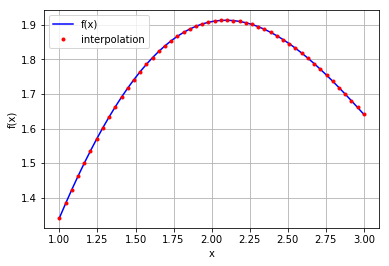

In [4]:
ipo = spi.splrep(x, f(x), k=3)
iyd = spi.splev(xd, ipo)

plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd,  'r.', label='interpolation')
plt.legend(loc=0); plt.grid(True)
plt.xlabel('x');   plt.ylabel('f(x)')

print("""f(xd), iyd의 일치확인 : {}
       \nf(xd), iyd의 MSE    : {}""".format(np.allclose(f(xd), iyd), np.sum((f(xd) - iyd) ** 2) / len(xd)))
# 결론
# 수치적으로는 보간법이 완벽히 적용되지 않음
# 반면 오차승수값은 아주 작다

<br>
## <strong>2 최적화 Convex Optimization
<strong>인수교정</strong> 및 <strong>대리인 효용함수 최적화</strong>시 활용
### <strong>01 데이터 살펴보기
Introduction

Z 의 크기 : (50, 50)


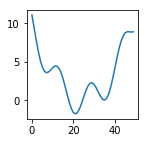

In [5]:
def fm(x, y):
    return (np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2)  

x = np.linspace(-10, 10, 50)                  # -10 ~ 10 을 50개로 분할  (1d array)
y = np.linspace(-10, 10, 50)
plt.figure(figsize=(2,2)); plt.plot(fm(x,y))  # 각 구간의 제곱근을 더한 결과로 크기가 크게 차이난다

# 다차원 데이터로 변환
X, Y = np.meshgrid(x, y)
Z    = fm(X, Y)
print('Z 의 크기 : {}'.format(Z.shape))

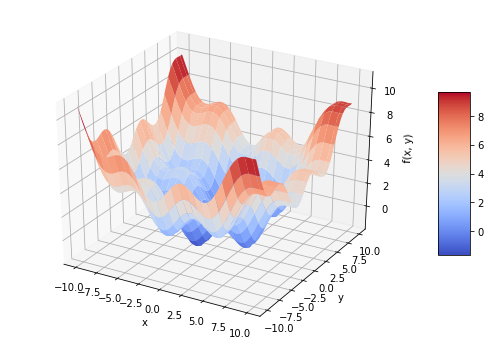

In [6]:
# Visualization (3D 시각화)
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

fig  = plt.figure(figsize = (9, 6))
ax   = fig.gca(projection = '3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
# 결론 : 최소점을 눈으로는 찾기가 힘들 정도로 복잡하다

### <strong>02 전역 최적화
import <strong>scipy.optimize.brute

In [7]:
def fo(p):
    x, y = p
    z    = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print('%8.4f %8.4f %8.4f' % (x, y, z))
    return z

import scipy.optimize as spo
output = True # 연산 과정을 출력
              # (-10, 10.1, 5) : -10 ~ 10 사이 정수 5개 분할 출력
op1 = spo.brute( fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish = None ) # 최적값을 찾기위한 Train을 실시
op1

-10.0000 -10.0000  11.0880
-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120


array([ 0.,  0.])

In [8]:
output   = False  # 연산 과정은 출력하지 않는다
opt1     = spo.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)
x_1, y_1 = opt1
print("""최소화 지점의 x, y : {}
        \nfo(x,y)에 x, y  : {}""".format(opt1, fm(x_1, y_1)))

최소화 지점의 x, y : [-1.4 -1.4]
        
fo(x,y)에 x, y  : -1.7748994599769203


### <strong>03 국소 최적화 Local Optimization
import <strong>scipy.optimize.fmin</strong> : <strong>전역 최적화 결과 (opt1)</strong>를 기반으로 <strong>국소 최적화를 진행</strong>

In [9]:
output = True
opt2 = spo.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)
opt2

 -1.4000  -1.4000  -1.7749
 -1.4700  -1.4000  -1.7743
 -1.4000  -1.4700  -1.7743
 -1.3300  -1.4700  -1.7696
 -1.4350  -1.4175  -1.7756
 -1.4350  -1.3475  -1.7722
 -1.4088  -1.4394  -1.7755
 -1.4438  -1.4569  -1.7751
 -1.4328  -1.4427  -1.7756
 -1.4591  -1.4208  -1.7752
 -1.4213  -1.4347  -1.7757
 -1.4235  -1.4096  -1.7755
 -1.4305  -1.4344  -1.7757
 -1.4168  -1.4516  -1.7753
 -1.4305  -1.4260  -1.7757
 -1.4396  -1.4257  -1.7756
 -1.4259  -1.4325  -1.7757
 -1.4259  -1.4241  -1.7757
 -1.4304  -1.4177  -1.7757
 -1.4270  -1.4288  -1.7757


array([-1.42702972, -1.42876755])

In [10]:
output   = False
x_1, y_1 = opt2
print("""극소화 최소화 지점 x, y : {}
        \nfo(x,y)에 극소화 x, y : {}""".format(opt2, fm(x_1, y_1)))

극소화 최소화 지점 x, y : [-1.42702972 -1.42876755]
        
fo(x,y)에 극소화 x, y : -1.7757246992239009


In [11]:
# 주의할 점
# 전역 최소화로 범위를 축소한 뒤, 극소 최소화로 점검을 해야 한다
# 이를 무시하고 임의 범위를 적용시, 최솟값이 0보다 커지는 문제가 발생한다
output = False
spo.fmin(fo, (2.0, 2.0), maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([ 4.2710728 ,  4.27106945])

### <strong>04 제약조건이 있는 최적화
부등식의 제약조건 내 최적화 Constrained Optimization

In [12]:
# 최소화 대상 함수
from math import sqrt
import scipy.optimize as spo

def Eu(p):
    s, b = p
    return -(0.5 * sqrt(s*15 + b*5) + 0.5*sqrt(s*5 + b*12))

cons = ({'type':'ineq', 'fun':lambda p: 100 - p[0]*10 - p[1]*10}) # 제약조건을 정의
bnds = ((0, 1000), (0, 1000))                                     # 예산제한 : 충분히 큰 범위값을 지정한다
result = spo.minimize(Eu, [5, 5], method='SLSQP',                 # .minimize 메서드 활용 : ([5,5] :최적화를 위한 초기 인수값) 
                      bounds = bnds, constraints = cons); result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 8.02547122,  1.97452878])

In [13]:
print("""최적 인수값 : {}
        \n최적 함수 값 (단 부호는 반대) : {}
        \n최적 주식수와 가격 벡터의 내적을 연산 : {}""".format(result['x'],    # 최적의 인수값
                                                      result['fun'],  # 최적 함수 값
                                                      np.dot(result['x'], [10,10])))  # 최적 주식과, 가격벡터의 내적

최적 인수값 : [ 8.02547122  1.97452878]
        
최적 함수 값 (단 부호는 반대) : -9.700883611487832
        
최적 주식수와 가격 벡터의 내적을 연산 : 99.99999999999999


 <br>
## <strong>3 정적분 Integration
위험중립 결과값을, 할인한 기댓값으로 연산시 활용

### <strong>01 데이터 정의 및 정적분 구간의 계산
Sin()

In [14]:
import scipy.integrate as sci
def f(x):
    return np.sin(x) + 0.5 * x

a, b  = 0.5, 9.5                                 # 정적분의 좌극한, 우극한
Ix    = np.linspace(a, b) 
Iy    = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]  # list 여럿 이어붙이기
verts[:7]

[(0.5, 0),
 (0.5, 0.72942553860420301),
 (0.68367346938775508, 0.97348189928683826),
 (0.86734693877551017, 1.196288954158784),
 (1.0510204081632653, 1.3934407035518863),
 (1.2346938775510203, 1.5613942232434239),
 (1.4183673469387754, 1.6975888527037084)]

### <strong>02 정적분 구간을 시각화
Polygon( [X, Y 좌표 list 객체], facecolor='0.7', edgecolor='0.5')

[Text(0,0,'$a$'), Text(0,0,'$b$')]

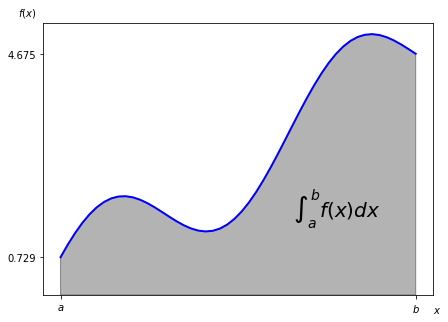

In [15]:
# x, y 데이터 곡선을 시각화
from matplotlib.patches import Polygon
fig, ax = plt.subplots(figsize = (7, 5))
plt.plot(Ix, Iy, 'b', linewidth = 2)
plt.ylim(ymin = 0)

# 함수내 정적분 구간 시각화
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)

# 그래프의 라벨을 지정
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$",  # 적분 구간에 글자표시
         horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')         # x 축의 끝에  x 표시
plt.figtext(0.075, 0.9, '$f(x)$')      # y 축의 끝에  f(x) 표시
ax.set_xticks((a, b))                  # x축 a, b 를 marked
ax.set_yticks([f(a), f(b)])            # y축 유효구간 marked
ax.set_xticklabels(('$a$', '$b$'))

### <strong>03 수치적분
Numerical Integration

In [16]:
# 정적분의 계산
import scipy.integrate as sci
print("가우스 구적법  : ", sci.fixed_quad(f, a, b)[0])
print("적응 구적법    : ", sci.quad(f, a, b)[0])
print("롬베르크 적분법 : ", sci.romberg(f, a, b))

xi = np.linspace(0.5, 9.5, 25)
print("array 객체로 사다리꼴 정적분 : ", sci.trapz(f(xi), xi))
print("array 객체로 심슨 정적분    : ", sci.simps(f(xi), xi))

가우스 구적법  :  24.3669959671
적응 구적법    :  24.374754718086752
롬베르크 적분법 :  24.3747547181
array 객체로 사다리꼴 정적분 :  24.3527332715
array 객체로 심슨 정적분    :  24.3749641846


### <strong>04 시뮬레이션을 사용한 적분
Integration by Simulation

In [17]:
# 연속 데이터의 평균을 활용하여 적분을 계산
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i * 10) * (b - a) + a
    print(np.sum(f(x))  / len(x) * (b - a))

24.8047622793
26.5229188983
26.2655475192
26.0277033994
24.9995418144
23.8818101416
23.5279122748
23.507857659
23.6723674607
23.6794104161
24.4244017079
24.2390053468
24.115396925
24.4241919876
23.9249330805
24.1948421203
24.1173483782
24.1006909297
23.7690510985


<br>
## <strong>4 심볼릭 연산
Symbolic Computation : <strong>pip install sympy</strong>

### <strong>01 심볼릭 연산의 기초
수식을 보기좋게 조합 및 활용 

In [18]:
import sympy as sy
x, y = sy.Symbol('x'), sy.Symbol('y')    # 매개변수 : 심볼릭 객체를 생성
print(type(x))

print(sy.sqrt(x))                        # x 제곱근 수학식
print('3+sy.sqrt(x)-4**2 :', 3 + sy.sqrt(x) - 4 ** 2)
f = x**2 + 3 + 0.5*x**2 + 3/2           # x 제곱 수학식
print(sy.simplify(f))

sy.init_printing(pretty_print=False, use_unicode=False)  # ASCII 기법을 사용함을 정의(레이텍, 유니코드, 아스키)
print(sy.pretty(f))                                      # 제곱을  보기좋게 표시
print(sy.pretty(sy.sqrt(x) + 0.5))                       # 제곱근을 보기좋게 표시

<class 'sympy.core.symbol.Symbol'>
sqrt(x)
3+sy.sqrt(x)-4**2 : sqrt(x) - 13
1.5*x**2 + 4.5
     2      
1.5*x  + 4.5
  ___      
\/ x  + 0.5


In [19]:
# pi값의 계산
pi_str = str(sy.N(sy.pi, 40000))  # sy.pi 값을 40,000 자릿수까지 호출
print('Pi값의 앞 40자릿수 출력    :', pi_str[:40])
print('Pi값의 뒷 40자릿수 출력    :', pi_str[-40:])
print('Pi중 652272와 일치 인덱스 :', pi_str.find('652272'))

Pi값의 앞 40자릿수 출력    : 3.14159265358979323846264338327950288419
Pi값의 뒷 40자릿수 출력    : 3907469361988150781468526213325247383765
Pi중 652272와 일치 인덱스 : 3987


### <strong>02 방정식
해당 수식을 연산가능 Equations

In [20]:
# 다항 방정식 풀이가 가능
print('X^2 - 1 = 0          풀이 :', sy.solve(x ** 2 - 1))
print('X^2 - 1 - 3 = 0      풀이 :', sy.solve(x ** 2 - 1 - 3))
print('X^3 + 0.5X^2 -1 = 0  풀이 :', sy.solve(x ** 3 + 0.5 * x ** 2 - 1))
print('X^2 + Y^2 = 0  복소수 풀이 :', sy.solve(x ** 2 + y ** 2))

X^2 - 1 = 0          풀이 : [-1, 1]
X^2 - 1 - 3 = 0      풀이 : [-2, 2]
X^3 + 0.5X^2 -1 = 0  풀이 : [0.858094329496553, -0.679047164748276 - 0.839206763026694*I, -0.679047164748276 + 0.839206763026694*I]
X^2 + Y^2 = 0  복소수 풀이 : [{x: -I*y}, {x: I*y}]


### <strong>03 적분
Integration

In [21]:
int_func = sy.integrate(sy.sin(x) + 0.5 * x, x)
print('\n f(x):\n', sy.pretty(int_func))   # 부정적분 함수를 출력

Fb = int_func.subs(x, 9.5).evalf()
Fa = int_func.subs(x, 0.5).evalf()
print('적분 결과 :', Fb - Fa)
print('적분 결과 :', sy.integrate(sy.sin(x) + 0.5 * x, (x, 0.5, 9.5)))
# sy.integrate( 수식, (매개변수, 구간1, 구간2)) : 적분 구간을 인수로 대입


 f(x):
       2         
0.25*x  - cos(x)
적분 결과 : 24.3747547180867
적분 결과 : 24.3747547180867


In [22]:
# 심볼릭 객체 (a, b)를 정의
a, b = sy.symbols('a b')                   
print('적분 심볼릭 객체 :', sy.pretty(sy.Integral(sy.sin(x) + 0.5 * x, (x, a, b))))  # 적분 수식을 출력

int_func_limits = sy.integrate(sy.sin(x) + 0.5 * x, (x, a, b))
print(sy.pretty(int_func_limits))

# 심볼릭 {dict} 객체로 입력
print('\na, b 객체에 {dict}를 활용하여 데이터 입력 : ',
      int_func_limits.subs({a : 0.5, b : 9.5}).evalf())

적분 심볼릭 객체 :   b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      
        2         2                  
- 0.25*a  + 0.25*b  + cos(a) - cos(b)

a, b 객체에 {dict}를 활용하여 데이터 입력 :  24.3747547180868


### <strong>04 미분
부정적분 함수를 다시 미분시, 본래의 함수로 되돌아간다

In [23]:
int_func = sy.integrate(sy.sin(x) + 0.5 * x, x)
print(int_func.diff())
f = (sy.sin(x) + 0.05 * x ** 2
   + sy.cos(y) + 0.05 * y ** 2)

del_x = sy.diff(f, x)  # x로 편미분 : sy.diff(f(x), 편미분)
del_y = sy.diff(f, y)  # y로 편미분
print('d/dx :', del_x, '\nd/dy :', del_y)

# d/dx, d/dy 미분 수식에 '-1.5'를 대입
xo = sy.nsolve(del_x, -1.5); print('\nd/dx (-1.5 대입결과) :', xo)
yo = sy.nsolve(del_y, -1.5); print('d/dy (-1.5 대입결과) :', yo)
print('전역 최소점 :', f.subs({x : xo, y : yo}).evalf())

# d/dx, d/dy 미분 수식에 '1.5'를 대입
xo = sy.nsolve(del_x, 1.5); print('\nd/dx (1.5 대입결과) :', xo)
yo = sy.nsolve(del_y, 1.5); print('d/dx (1.5 대입결과) :', yo)
print('전역 최소점 :', f.subs({x : xo, y : yo}).evalf())

# 간단한 미분 적분시, 수식심볼을 사용하면 '상호대화식 금융분석'에 효과적 활용 가능하다

0.5*x + sin(x)
d/dx : 0.1*x + cos(x) 
d/dy : 0.1*y - sin(y)

d/dx (-1.5 대입결과) : -1.42755177876459
d/dy (-1.5 대입결과) : 7.06817435809582
전역 최소점 : 2.31748761946137

d/dx (1.5 대입결과) : 1.74632928225285
d/dx (1.5 대입결과) : 7.06817435809582
전역 최소점 : 4.34246735131328
